In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import OllamaEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls = ["https://www.goal.com/en",
        "https://www.fourfourtwo.com/",
        "https://footballinsides.com/"]
f_loaders = [WebBaseLoader(url).load() for url in urls]
f_loaders

[[Document(metadata={'source': 'https://www.goal.com/en', 'title': 'Football News, Live Scores, Results & Transfers | Goal.com', 'description': 'The latest football news, live scores, results, rumours, transfers, fixtures, tables and player profiles from around the world, including EURO U21.', 'language': 'en'}, page_content='Football News, Live Scores, Results & Transfers | Goal.comSCORESLATEST Football NewsNewsTransfersOpinionAnalysisPlayer RatingsWinners & LosersPower RankingsEntertainmentCultureKits BootsTicketsBuyers\' guidesGamingQuizzesSocialFacebookXInstagramTikTokYouTubeCOMPETITIONS LeaguesPremier LeagueLa LigaSerie ABundesligaLigue 1UEFA Champions LeagueUEFA Europa LeagueUEFA Europa Conference LeagueMLSSaudi Pro LeagueClubsManchester UnitedLiverpoolManchester CityChelseaArsenalReal MadridBarcelonaPSGBayern MunichJuventusInter MiamiAl-NassrInternationalEnglandArgentinaBrazilFranceUSMNTGermanySpainItalyPortugalNetherlandsBelgiumWomen\'s FootballLatest NewsUEFA Women\'s EURO 202

In [4]:
f_list = [item for sublist in f_loaders for item in sublist]

f_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
)

f_docs = f_text_splitter.split_documents(f_list)

f_vectorstore = FAISS.from_documents(
    documents=f_docs,
    embedding=OllamaEmbeddings(model="llama3:latest", base_url="http://localhost:11434"),
)

f_retriever = f_vectorstore.as_retriever()

/tmp/ipykernel_1086763/2326766501.py:12: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embedding=OllamaEmbeddings(model="llama3:latest", base_url="http://localhost:11434"),


In [5]:
f_retriever.invoke("football news today")

[Document(id='42c85851-65fd-4173-8d7f-c084a17d38c0', metadata={'source': 'https://www.fourfourtwo.com/', 'title': 'Football news, features and statistics | FourFourTwo', 'description': "The latest football news, in-depth features, tactical and statistical analysis from FourFourTwo, the UK's favourite football monthly.", 'language': 'en'}, page_content="How Harry Maguire won a new contract at Man United\n\n\nHarry Maguire has lived through one of the most polarizing careers in modern football. From becoming the world’s most expensive defender at Manchester United to facing relentless mockery, boos, and even his own fans turning on him, Maguire’s story is one of resilience against all odds. And yet, when England needed him most - at the 2018 World Cup, Euro 2020, and beyond - he stood tall, delivering on the biggest stages. A journey from ridicule to redemption, and after his goal v Liverpool, don't say we didn't tell you so. Harry Maguire: Respect the name.\n\n\n\n\n\n \n\n\n\n\n\n\n\n\

In [6]:
from langchain.tools.retriever import create_retriever_tool
f_retriever_tool = create_retriever_tool(
    retriever=f_retriever,
    name="Football_News_Retriever",
    description="Useful for when you need to find football news articles and information about football.",
)

/home/ta-seen/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
f_retriever_tool

Tool(name='Football_News_Retriever', description='Useful for when you need to find football news articles and information about football.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x72a134e445e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x72a134ce4be0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x72a134e44940>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x72a134ce4be0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, 

In [8]:
urls = ["https://www.skysports.com/cricket",
        "https://www.cricbuzz.com/",
        "https://www.wisden.com/"]
c_loaders = [WebBaseLoader(url).load() for url in urls]
c_loaders

[[Document(metadata={'source': 'https://www.skysports.com/cricket', 'title': 'Cricket Scores, Highlights, News & Fixtures | Sky Sports', 'description': 'Sky Sports Cricket - live scores, news results, highlights, videos, photos, test cricket, and fixtures for International and County Cricket matches.', 'language': 'en'}, page_content="\n\n\n\nCricket Scores, Highlights, News & Fixtures | Sky Sports\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\nSky Sports Homepage\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome\n\n\n\n                                  Sports\n\n\n\n\n\n\nFootball\nF1\nCricket\nRugby Union\nRugby League\nGolf\nBoxing\nNFL\nTennis\nRacing\nDarts\nNetball\nMMA\nMore Sports\n\n\n\n\nScores\nWatch\nSky Bet\nShop\n\nMore\n\n\n\n\n\nPodcasts\nUpcoming on Sky\nGet Sky Sports\nSky Sports App\nSky Sports with no contract\nKick It 

In [9]:
c_list = [item for sublist in c_loaders for item in sublist]

c_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
)

c_docs = c_text_splitter.split_documents(c_list)

c_vectorstore = FAISS.from_documents(
    documents=c_docs,
    embedding=OllamaEmbeddings(model="llama3:latest", base_url="http://localhost:11434"),
)

c_retriever = c_vectorstore.as_retriever()

In [10]:
c_retriever.invoke("Cricket news today")

[Document(id='3e825284-3736-4c13-848d-2a006fd320b5', metadata={'source': 'https://www.cricbuzz.com/', 'title': 'India vs South Africa | Live Cricket Score, Schedule, Latest News, Stats &amp; Videos | Cricbuzz.com', 'description': 'Get Live Cricket Scores, Scorecard, Schedules of International and Domestic cricket matches along with Latest News, Videos and ICC Cricket Rankings of Players on Cricbuzz.', 'language': 'en'}, page_content='to opposition" and treated draws as a last resortMove to TopHomeMatchesSeriesVideosNews\xa0APPSAndroidiOSFOLLOW US ONFacebookTwitterYoutubePinterestCOMPANYCareersAdvertiseCricbuzz TV AdsAbout UsPrivacy NoticeTerms of Use© 2025 Cricbuzz.com, Cricbuzz Platforms Limited. All rights reserved | The Times of India | Navbharat Times'),
 Document(id='1630309b-5cab-4bc4-9a05-25c123fa4340', metadata={'source': 'https://www.wisden.com/', 'title': 'Live Cricket Score | Cricket News and Videos | Cricket Updates | Wisden', 'description': 'Get all the latest cricket news

In [11]:
c_retriever_tool = create_retriever_tool(
    retriever=c_retriever,
    name="Cricket_News_Retriever",
    description="Useful for when you need to find cricket news articles and information about cricket.",
)

In [12]:
tools=[f_retriever_tool,c_retriever_tool]

## Retriver complete

In [47]:
import os
import re
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
llm=ChatGroq(model="qwen/qwen3-32b")
result=llm.invoke("Hi!!!")
raw=result.content

# Remove the <think>...</think> section
cleaned = re.sub(r"<think>.*?</think>\s*", "", raw, flags=re.DOTALL)
cleaned

"Hello! 😊 How can I assist you today? Feel free to ask any questions or share what's on your mind!"

In [48]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state.
    Given the state, it will decide to retrieve using the retriever tools, or simply end.
    
    Args:
        state(messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages.
    """
    print("---CALL AGENT---")
    messages = state["messages"]

    model = llm
    model = model.bind_tools(tools)

    # ✅ Correct: positional argument only
    response = model.invoke(messages)

    return {"messages": [response]}


In [49]:
from typing import Literal

from langchain import hub
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [50]:
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.
    
    Args:
        state(messages): The current state containing messages.
        
    Returns:
        str: A decision for whether the documents are relevant or not.
    """
    print("---GRADE DOCUMENTS---")
    
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    llm = ChatGroq(model="qwen/qwen3-32b")

    llm_with_tool = llm.with_structured_output(grade)

    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content

    scored_output = chain.invoke({"question": question, "context": docs})
    score = scored_output.binary_score

    if score.lower() == "yes":
        print("Documents are relevant.")
        return "generate"
    else:
        print("Documents are not relevant.")
        return "rewrite"


In [51]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="qwen/qwen3-32b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [52]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="qwen/qwen3-32b")
    response = model.invoke(msg)
    return {"messages": [response]}

In [53]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

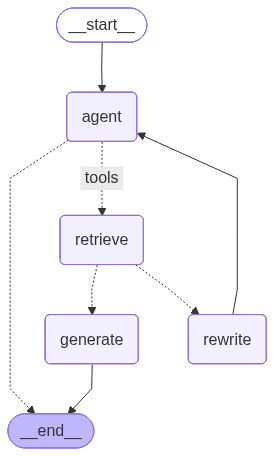

In [54]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(AgentState)
workflow.add_node("agent", agent)
retrieve = ToolNode([c_retriever_tool, f_retriever_tool])
workflow.add_node("retrieve", retrieve)
workflow.add_node("rewrite", rewrite)
workflow.add_node("generate", generate)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", tools_condition,
    {
        "tools": "retrieve",
        END: END,   
    },
)

workflow.add_conditional_edges("retrieve", grade_documents)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [57]:
graph.invoke({"messages": "What is Current football news?"})

---CALL AGENT---
---GRADE DOCUMENTS---
Documents are relevant.
---GENERATE---


{'messages': [HumanMessage(content='What is Current football news?', additional_kwargs={}, response_metadata={}, id='8e52ee25-9f7d-48e0-8bab-d4e8b85dae5d'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for current football news. Let me check which tool I can use here. There\'s the Football_News_Retriever function, which is designed to find football news articles and information. The parameters require a query string. Since the user wants the latest news, I should use a query like "latest" or "current" to fetch the most recent updates. I\'ll call the function with the query "current" to get the latest football news.\n', 'tool_calls': [{'id': 'ywn51grph', 'function': {'arguments': '{"query":"current"}', 'name': 'Football_News_Retriever'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 124, 'prompt_tokens': 259, 'total_tokens': 383, 'completion_time': 0.205940251, 'prompt_time': 0.010284884, 'queue_time': 0.16513

In [58]:
graph.invoke({"messages": "What is Current cricket news?"})

---CALL AGENT---
---GRADE DOCUMENTS---
Documents are not relevant.
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='What is Current cricket news?', additional_kwargs={}, response_metadata={}, id='c2b4d330-f69b-46c4-be0e-ef134d246844'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the current cricket news. I need to figure out which tool to use here. Looking at the available tools, there\'s a Cricket_News_Retriever function. The description says it\'s useful for finding cricket news articles and information. The parameters require a query string. Since the user wants current news, I should use a query that\'s broad enough to capture recent updates. Maybe "latest cricket updates" or "recent cricket news" would work. Let me go with "latest cricket updates" as the query. I\'ll structure the tool call with the function name and the query parameter.\n', 'tool_calls': [{'id': 'y5acqbxwe', 'function': {'arguments': '{"query":"latest cricket updates"}', 'name': 'Cricket_News_Retriever'}, 'type': 'function'}]}, response_metad

In [59]:
graph.invoke({"messages": "What is Current political news?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Current political news?', additional_kwargs={}, response_metadata={}, id='88dd536d-e422-435b-b53e-31c49b7daa15'),
  AIMessage(content="I don't have access to current political news through the provided tools. My capabilities are limited to retrieving football and cricket news via the Football_News_Retriever and Cricket_News_Retriever functions. Would you like me to look up any sports-related information instead?", additional_kwargs={'reasoning_content': "Okay, the user is asking for current political news. Let me check the tools available. The tools provided are Football_News_Retriever and Cricket_News_Retriever. Both are for sports news, specifically football and cricket. The user's query is about politics, which isn't covered by the available functions. Since there's no tool for political news, I should inform the user that I can't help with that request using the provided tools. I need to mention that my capabilities are limited to footbal

In [62]:
output = graph.invoke({"messages": "Football news?"})

---CALL AGENT---
---GRADE DOCUMENTS---
Documents are relevant.
---GENERATE---


In [74]:
output['messages'][-1]

HumanMessage(content='<think>\nOkay, the user is asking for football news. Let me check the provided context. The main pieces here are about Harry Maguire getting a new contract at Man United and Romelu Lukaku\'s career. There\'s also some mention of Pep Guardiola\'s 1000th game and a cultural collab with Big Boi and MUNDIAL.\n\nFirst, the question is general: "Football news?" So I need to summarize the key points from the context. The user probably wants a concise answer with the latest updates. Maguire\'s contract renewal is a significant point, especially after his ups and downs. Then Lukaku\'s career journey is another major story. The other parts about Guardiola\'s milestone and the Stankonia collab are also relevant but maybe less urgent.\n\nI should prioritize the most prominent news. Maguire\'s new contract is directly mentioned twice, so that\'s a main point. Then Lukaku\'s career as a secondary point. The third sentence can mention the other bits briefly. Need to keep it unde

In [75]:
# The final message is always the last one in the list (or messages[3] in this 5-step run)
final_message_content = output['messages'][-1].content 

# Use a regular expression to clean up the <think> tags
import re
cleaned_output = re.sub(r"<think>.*?</think>\s*", "", final_message_content, flags=re.DOTALL)

print(cleaned_output)

Harry Maguire secured a new contract at Manchester United, marking a redemption arc after facing criticism, while Romelu Lukaku's career journey from setbacks to stardom continues to dominate headlines. Pep Guardiola is set to reach 1000 games as a manager in his next match, and Big Boi and André 3000 have partnered with MUNDIAL for a Stankonia-themed capsule.


In [79]:
cleaned_output = re.sub(r"<think>.*?</think>\s*", "", graph.invoke({"messages": "Football news?"})['messages'][-1].content, flags=re.DOTALL)
cleaned_output


---CALL AGENT---
---GRADE DOCUMENTS---
Documents are relevant.
---GENERATE---


"Harry Maguire secured a new contract at Manchester United amid a career marked by resilience, transitioning from criticism to key performances for club and country. Meanwhile, Pep Guardiola is set to reach 1,000 managerial games, with Mikel Arteta praising his historic impact. Romelu Lukaku's journey from setbacks to stardom also highlights ongoing narratives in football."

In [80]:
cleaned_output = re.sub(r"<think>.*?</think>\s*", "", graph.invoke({"messages": "Current cricket news?"})['messages'][-1].content, flags=re.DOTALL)
cleaned_output

---CALL AGENT---
---GRADE DOCUMENTS---
Documents are relevant.
---GENERATE---


"The latest cricket news includes the Women's Big Bash League (WBBL 2025-26) and Hong Kong Sixes 2025, both scheduled for November 2025. A Pakistani youngster recently set a national record with a hundred in his third consecutive first-class game. Afghanistan Under-19 defeated Bangladesh Under-19 by 47 runs in the Bali Bash International on November 4, 2025."

In [81]:
cleaned_output = re.sub(r"<think>.*?</think>\s*", "", graph.invoke({"messages": "Current political news?"})['messages'][-1].content, flags=re.DOTALL)
cleaned_output

---CALL AGENT---


"I don't have access to current political news through the available tools. My capabilities are limited to sports news retrieval for football and cricket. Would you like me to look up any football or cricket-related information instead?"